## Primer vistazo a las Ecuaciones Diferenciales

![Leonhard Euler](../figuras/cap1_introeds.png){width=0.32\textwidth}

<blockquote>
  "Nada puede ser más absolutamente cierto que nada puede ser absolutamente cierto.”
  <footer>— Leonhard Euler</footer>
</blockquote>

## Introducción

Las **ecuaciones diferenciales** son una herramienta fundamental para modelar fenómenos en ciencias, ingeniería, economía y biología. Desde el ...

Por último, introduciremos una **ruta de solución sistemática con SageMath y Python**:
1.  ... simbólicamente con `desolve`.  
2. ... numéricos (Euler, Runge–Kutta).  
3. Interpretar los resultados ....  

De esta forma, sentamos las bases para el resto del libro, donde abordaremos modelos más complejos y técnicas de resolución avanzadas, manteniendo siempre un enfoque **aplicado, visual y consistente**.


### Objetivo
...

### Cómo aprender todo de éste capítulo
1) Lee el texto breve de cada sección.  
2) Ejecuta las celdas de **Sage** (simbólico y RK4) y, cuando esté, la versión **Python** (odeint/visualización).  
3) Aplica la **estrategia consistente**: simbólico → numérico → interpretación geométrica.


## Concepto de ecuación diferencial

Una **ecuación diferencial ordinaria (EDO)** relaciona una función desconocida con sus derivadas:
$$
\frac{dx}{dt} = f(t,x), \quad x(t_0)=x_0.
$$
La solución es una función $x(t)$ que satisface la ecuación y, cuando aplica, la condición inicial (PVI).

### Ejemplos introductorios de modelado (solo ideas; se desarrollan más adelante):
- Caída libre (modelo simple): $y''(t)=-g$.
- Desintegración radiactiva: $N'(t)=-\lambda N$.
- Mezclas en tanques (entrada/salida).
- Crecimiento poblacional: $P'(t)=kP$ (exponencial) o $P'(t)=k(1-\tfrac{P}{N})P$ (logística).

En este capítulo trabajaremos con **primer orden** y su interpretación geométrica.


## Crecimiento exponencial

Si la tasa de cambio de una población es proporcional a su tamaño:
$$
\frac{dP}{dt} = kP, \qquad P(0)=P_0,
$$
entonces
$$
P(t)=P_0 e^{kt}.
$$

- $k>0$: crecimiento multiplicativo.  
- $k<0$: decaimiento (ej. radiactivo con $k=-\lambda$).  

Usaremos este modelo como “hola mundo” de las EDOs: es lineal, separable y se resuelve exactamente.


### Ejemplo (Sagemath): Crecimiento poblacional
#### Ejemplo concreto, Computación simbólica

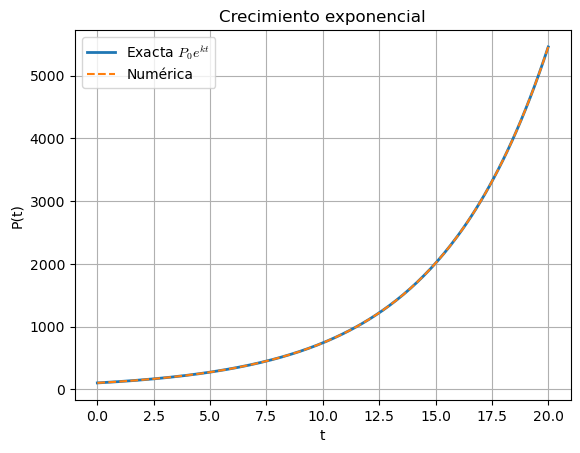

In [20]:
# (Python) Aproximación numérica y comparación con la solución exacta
# Nota: usa SciPy si está disponible; si no, se recurre a Euler como respaldo.
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import odeint

# Verificamos si está instalado scipy e importamos
try:
    from scipy.integrate import odeint
    use_scipy = True
except Exception:
    use_scipy = False

# Parámetros
P0 = 100.0
k  = 0.2
t  = np.linspace(0, 20, 200)

# Definimos el lado derecho de la ecuación diferencial
def f(P, tt):        # f = dP/dt
    return k*P

 # En caso de usar scipy.integrate.odeint (from scipy.integrate import odeint):
if use_scipy:
    P_num = odeint(lambda P, tt: f(P, tt), P0, t).ravel()
else:
    # Integración de Euler (respaldo didáctico)
    h = t[1]-t[0]
    P_num = [P0]
    for n in range(len(t)-1):
        P_num.append(P_num[-1] + h*f(P_num[-1], t[n]))
    P_num = np.array(P_num)

# Solución exacta
P_exact = P0*np.exp(k*t)

# Graficamos las soluciones exacta y nuimérica
plt.plot(t, P_exact, lw=2, label="Exacta $P_0 e^{kt}$")
plt.plot(t, P_num,  '--', label="Numérica")
plt.xlabel("t"); plt.ylabel("P(t)")
plt.title("Crecimiento exponencial")
plt.grid(True); plt.legend(); plt.show()


> En la práctica, no basta con obtener la **solución simbólica**: muchas veces necesitamos **simular** el modelo con valores concretos de los parámetros para interpretar el fenómeno.  
> 
> En el caso de la ecuación logística, tras resolver simbólicamente con `desolve`, ahora asignamos valores numéricos a:
>
> - $k$: tasa de crecimiento.  
> - $N$: capacidad de carga.  
> - $P_0$: población inicial.  
> - $T$: tiempo final de la simulación.  
>
> Con estos parámetros, definimos la función $f(t,P)$ y usamos **`desolve_rk4`** para integrar numéricamente la ecuación.  
> La gráfica resultante muestra cómo la población $P(t)$ evoluciona con el tiempo y tiende asintóticamente a la capacidad de carga $N$.


### Ejemplo (Sagemath): Crecimiento poblacional
#### Ejemplo concreto, Computación simbólica y numérica

Solución simbólica:


-(log(-N + P(t)) - log(P(t)))/k == (k*t - log(-N + P0) + log(P0))/k


Gráfica de la solución numérica (RK4):


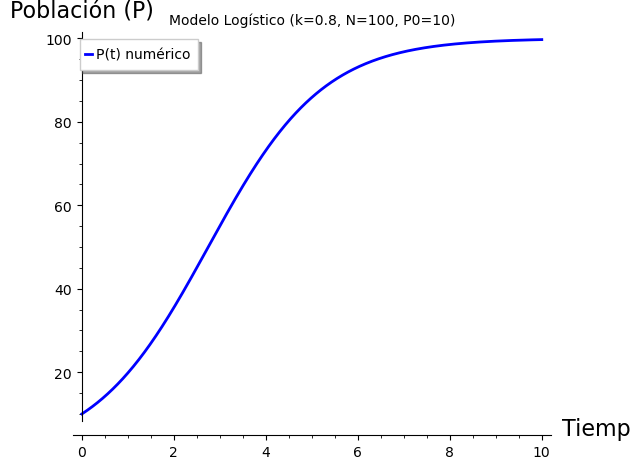

In [6]:
# %%(SageMath) Logística: simbólica + RK4
# --- Definiciones Simbólicas ---
t, k, N = var('t, k, N')
P = function('P')(t)
DE = diff(P, t) == k*(1 - P/N)*P
# --- Parte Simbólica ---
# Intenta resolver simbólicamente.
# La solución logística es conocida, así que Sage la encuentra.
print("Solución simbólica:")
sol = desolve(DE, P, ivar=t, ics=[0, P0])
show(sol)
# --- Parte Numérica ---
# ¡Aquí está el cambio! Asignamos valores numéricos a los parámetros.
k_val = 0.8 # Tasa de crecimiento
N_val = 100 # Capacidad de carga
P0_val = 10 # Población inicial
T_val = 10 # Tiempo final de la simulación
# Definimos la función f(t, P) usando los valores numéricos
f(t, P) = k_val * (1 - P/N_val) * P
# Ahora desolve_rk4 tiene todos los números que necesita
print("\nGráfica de la solución numérica (RK4):")
numerical_solution = desolve_rk4(f, P, ics=[0, P0_val], ivar=t,
end_points=[0, T_val], step=0.01)
# Creamos y mostramos la gráfica
line(numerical_solution, thickness=2, legend_label="P(t) numérico").show(
title=f"Modelo Logístico (k={float(k_val)}, N={N_val}, P0={P0_val})", axes_labels=['Tiempo (t)', 'Población (P)']
)


## ¿Cómo utilizar sagemath? (Sage “Quick Start”)

**Plantilla mínima en Sage:**
1) Definir variable independiente y función desconocida.  
2) Formular la ED (y, si aplica, una CI).  
3) Invocar `desolve` para solución simbólica.

Ejemplo lineal simple $y' = x + y$, $y(0)=1$:


In [23]:
# %%(SageMath) Quick Start: lineal simple
# Definimos la variables independiente
x = var('x')
# Definimos la función a integrar
y = function('y')(x)
# Definimos la ED
de = diff(y, x) == x + y

# Solución de la ecuación diferencial
sol = desolve(de, y, ics=[0, 1])  # intenta método exacto automáticamente
show(sol)


-x + 2*e^x - 1

### Análisis geométrico: campos de pendientes y líneas de fase

El **campo de pendientes** para $y' = f(t,y)$ muestra, en cada punto $(t,y)$, un segmento con pendiente $f(t,y)$.
- Las curvas solución son tangentes al campo: útil para **intuición cualitativa**.
- En **autónomas** $y'=f(y)$ podemos usar **líneas de fase** (sobre el eje $y$) para estudiar equilibrios y estabilidad.

> Consideremos la ecuación diferencial de primer orden definida por la función:
>
> $$
 f(t,y) = \frac{y^{2}}{2} - t
 $$
>
> A partir de esta función construimos el **campo de direcciones** (o campo de pendientes), el cual nos permite **visualizar geométricamente** el comportamiento de las soluciones de la EDO:
>
> $$
 y' = f(t,y) = \frac{y^{2}}{2} - t
 $$
>
> Posteriormente, podremos añadir una **trayectoria particular** a partir de una condición inicial para ilustrar cómo las curvas solución son tangentes al campo en cada punto.


### Ejemplo (Sagemath): Campo de pendientes
#### Ejemplo concreto, Computación numérica

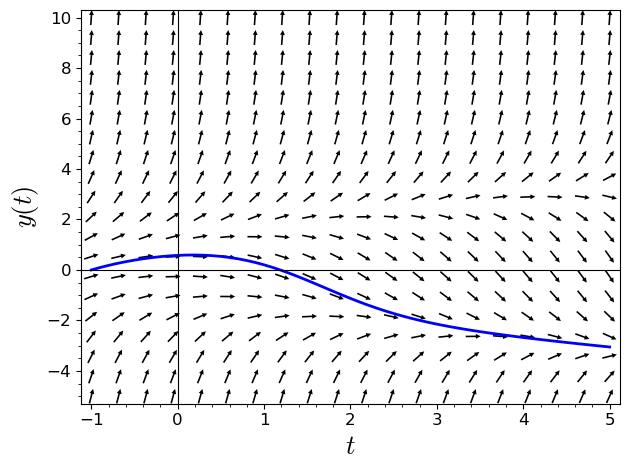

In [24]:
# %%(SageMath) Campo de pendientes + solución particular con RK4
t, y = var('t, y')
f(t, y) = y^2/2 - t

# Graficamos el campo de direcciones
p = plot_slope_field(f, (t, -1, 5), (y, -5, 10),
                     headaxislength=3, headlength=3,
                     axes_labels=['$t$', '$y(t)$'], fontsize=12)
# Resolvemos la ED, numéricamente
p += desolve_rk4(f, y, ics=[-1, 0], ivar=t,
                 output='plot', end_points=[-1, 5], thickness=2)
# Graficando
p.show(xmin=-1, xmax=5, ymin=-5, ymax=10)


## Ecuaciones de Orden superior. Primer vistazo

`ode_solver` (interfaz a GSL) ofrece varios algoritmos (rk8pd, rkf45, rk4, gear, etc.) y control fino:
- Útil en problemas “duros/rígidos” o con requisitos de tolerancia estrictos.
- Permite manejar **sistemas** y definir funciones con parámetros.

#### ED de 2o orden reducida a 1er orden. (Van der Pol):
> La **ecuación de Van der Pol** es un ejemplo clásico de **ecuación diferencial no lineal de segundo orden**, propuesta originalmente para modelar osciladores eléctricos:
>
> $$
 y'' - \mu \,(1 - y^2)\,y' + y = 0, \qquad \mu > 0.
 $$
>
> Para poder resolverla numéricamente en un computador, es habitual **convertirla en un sistema de primer orden**.  
> Definimos nuevas variables:
>
> $$
 y_1 = y, 
 \qquad 
 y_2 = y'.
> $$
>
> Entonces el sistema equivalente de primer orden es:
>
...
>
> De esta forma, hemos transformado la ecuación original en un sistema de dos EDOs de primer orden, lo que facilita su análisis y su implementación en métodos numéricos como **Runge–Kutta**.

### Ejemplo (Sagemath): Ecuación de Van Der Pol
#### Ejemplo concreto, Computación numérica.
El sistema de Van der Pol puede escribirse en forma **vectorial compacta** como:

$$
\mathbf{y}' =
\begin{bmatrix}
y_1' \\
y_2'
\end{bmatrix}
=\begin{bmatrix}
y_2 \\
\mu\,(1 - y_1^2)\,y_2 - y_1
\end{bmatrix}.
$$

donde $\mathbf{y} = \begin{bmatrix} y_1 \\[4pt] y_2 \end{bmatrix}$ representa el estado del sistema en el plano de fases $(y_1, y_2)$.

Utilizamos un objeto "solver" provisionado por el comando <code>ode_solver</code> 

#### (Opcional) Equivalente MATLAB en la misma lógica

**Simbólico primero; numérico si hace falta.** (Úsalo para contraste si tus lectores usan MATLAB).


```matlab
<--- %% (MATLAB) Plantilla simbólica y numérica rápidas --->
syms y(x)
ode  = diff(y,x) == x + y;
cond = y(0) == 1;
sol  = dsolve(ode, cond);    % Solución cerrada (si aplica)
disp(sol)

f = @(x,y) x + y;
[xv, yv] = ode45(f, [0 5], 1);   % Numérica
plot(xv, yv, 'LineWidth', 2); grid on
xlabel('x'); ylabel('y(x)')
title('Solución numérica (ode45)')
```

## Qué viene después

En el Capítulo 2 profundizaremos en **primer orden** (separables, lineales, exactas, factores integrantes), reforzando la **lectura geométrica** y los criterios de **existencia–unicidad** que justifican los diagramas y la estabilidad.


## Apéndice práctico (copiar/pegar rápido)

### Campo + trayectoria (plantilla Sage):


```sage
< --- %%(SageMath) Campo + trayectoria --->
t, y = var('t, y')
f(t, y) = ...                        # define f(t, y)
p = plot_slope_field(f, (t, a, b), (y, c, d))
p += desolve_rk4(f, y, ics=[t0, y0], ivar=t,
                 output='plot', end_points=[a, b], thickness=2)
p.show(xmin=a, xmax=b, ymin=c, ymax=d)
```

## Referencias

- *The Ordinary Differential Equations Project* (2024 Edition).  
  Proyecto abierto para la enseñanza de EDOs, con ejemplos de modelado, análisis cualitativo y rutinas numéricas en SageMath.  
  Disponible en: https://odeproject.org  

- Joyner, D. (2021). *Computational Mathematics with SageMath*.  
  Springer. Manual de referencia para el uso de `desolve`, `desolve_rk4`, `ode_solver` y rutinas simbólicas y numéricas en Sage.  

- Johansson, R. (2018). *Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib*.  
  Apress. Recurso para integrar métodos numéricos en Python (`odeint`, visualización, simulación).  

- Boyce, W. E., & DiPrima, R. C. (2017). *Elementary Differential Equations and Boundary Value Problems* (10th ed.). Wiley.  
  Texto clásico que introduce modelos básicos como el crecimiento exponencial, logístico y ecuaciones de primer orden.  

- Zill, D. G. (2018). *Ecuaciones diferenciales con aplicaciones de modelado* (10ª ed.). Cengage Learning.  
  Enfoque aplicado con numerosos ejemplos de modelado y resolución paso a paso.  
